In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, Button
from IPython.display import display, HTML


#

In [2]:
#


# useful math functions

def d_dx(a, dx):
    ddx = -( a[:-1] - a[1:] )/(dx) 
    return ddx
def d_dy(a, dy):
    ddy = -( a[:,:-1] - a[:,1:] )/(dy)
    return ddy
def div(u, v, DX):
    div = d_dx(u, DX[0]) + d_dy(v, DX[1])
    return div


def planegauss(shape, w = 1/2, win=((-2, 2), (-2, 2))): # function to generate a gaussian across a 2d array, used for gaussian initial condition
    h=np.empty(shape, dtype=np.float32)
    npx = np.linspace( win[0][0], win[0][1], shape[0] )
    npy = np.linspace( win[1][0],win[1][1], shape[1] )
    npxx, npyy = np.meshgrid(npx, npy)
    h = np.exp( -np.e * ( npxx*npxx + npyy*npyy ) / (w*w) )
    return (h)




def lingauss(shape, w = 1/2, ax = 0, win = (-2, 2)):
    h=np.empty(shape, dtype=np.float32)
    npx = np.linspace( win[0], win[1], shape[0] )
    npy = np.linspace( win[0], win[1], shape[1] )
    npxx, npyy = np.meshgrid(npy, npx)
    xy = (npyy, npxx)[ax]
    h = np.exp( -np.e * ( xy*xy ) / (w*w) )
    return (h)
#

In [3]:
#

class p():
    g = np.float32(10.0)




        
class initcons():
#     def __init__(self):
    #self.
    DX = np.array([100, 100], dtype=np.float32) # meters
    size = (100, 100) # grid squares (dx)

    #initial condition constants
    #self.
    h = 100-300*planegauss(size, 1)
#     h = 100*np.ones(size)
    n = 1*lingauss(size, 1/4, 0, (-3, 1)) # intial condition
    u = np.zeros((size[0]+1, size[1]+0)) # global x vel array
    v = np.zeros((size[0]+0, size[1]+1)) # global y vel array


# initcons = initcon()

class State():
    g = 10 # m/s/s
    def __init__(self, DX, h, n, u, v):
        
        self.DX = DX
        self.h = h
        
        self.wavespeed = np.sqrt(np.max(self.h)*p.g)
        
        self.n = np.asarray(n, dtype=np.float32)
        self.u = np.asarray(u, dtype=np.float32) # global x vel array
        self.v = np.asarray(v, dtype=np.float32) # global y vel array
        
        
        assert (np.isscalar(self.h) or self.h.shape == self.h.shape) # 'or' is short circuit
        self.calcDt()
        return
    
    def calcDt(self, fudge = 5):
        self.dt = np.min(self.DX)/(fudge*self.wavespeed)
        return
    def setnuv(self, n, u, v):
        self.n, self.u, self.v = n, u, v
        return


state1 = State(initcons.DX, initcons.h, initcons.n, initcons.u, initcons.v)


#

In [4]:
#


# display functions

def dispimg(a):
    imgplot = plt.imshow(a, 'Oranges')
    plt.colorbar()
    return

def disp3d(aa, box = (None, None, None), fsize = (8, 8), lines=(35,35)):
    xlim = box[0]
    ylim = box[1]
    zlim = box[2]
    if (xlim==None):
        xlim = (0, aa[0].shape[0])
    if (ylim==None): ylim = (0, aa[0].shape[1])
    if (zlim==None):
        ran = np.max(aa[0])-np.min(aa[0])
        zlim = (np.min(aa[0])-ran, np.max(aa[0])+ran)
        zlim = (-2, 2)
    
    x = np.linspace(0, aa[0].shape[0]-1, lines[0], dtype=int)
    y = np.linspace(0, aa[0].shape[1]-1, lines[1], dtype=int)
    xx, yy = np.meshgrid(x, y, indexing='ij')
    
    
    
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(111, projection='3d')
#     t = 0
#     wav = np.cos(2*np.pi*np.linspace(-2, 2, 8))**2 /2
    for a in aa:
        A = a[xx,yy]
#         col = (wav[-1-t], wav[-t], wav[t-1])
        ax.plot_wireframe(xx, yy, A)
#         t+=1
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    
    plt.show()
    
    return

def contour(a, fsize = (8, 8)):
    x = np.arange(0, a.shape[0], dtype=np.float32)
    y = np.arange(0, a.shape[1], dtype=np.float32)
    xx, yy = np.meshgrid(x, y)
    
    plt.figure(figsize=fsize)
    plt.contour(xx, yy, a)
    plt.title("water surface height")
    plt.colorbar()
    
    return


def vect(u, v, xlim='default', ylim='default', fsize=(8, 8), arws=(10, 10), arwsz=100):
    if (xlim=='default'): xlim = (0, u.shape[0])
    if (ylim=='default'): ylim = (0, v.shape[1])
    arws = (int(arws[0]), int(arws[1]))
    
    x = np.linspace(0, u.shape[0]-1, arws[0], dtype=int)
    y = np.linspace(0, v.shape[1]-1, arws[1], dtype=int)
    xx, yy = np.meshgrid(x, y, indexing='ij')
    uu = u[x,y]
    vv = v[x,y]
    m = np.hypot(uu, vv)
    
    fig, ax = plt.subplots(figsize=fsize)
    ax.quiver(xx, yy, vv, uu, m, scale = 1/arwsz)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()
    
    return




    

#

group velocity


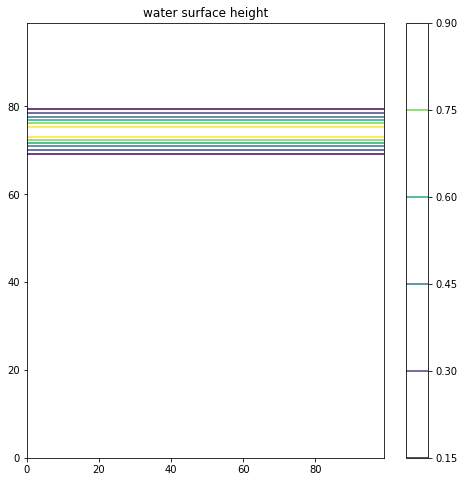

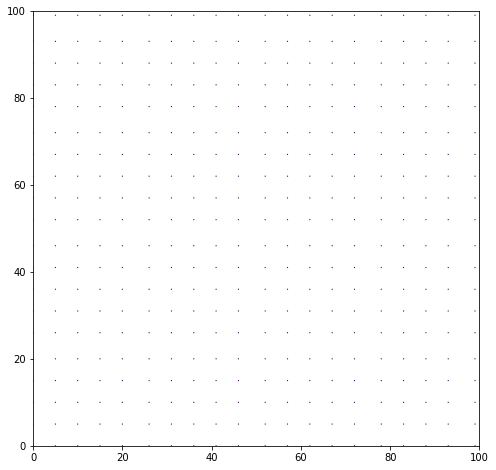

In [5]:
#


#display initial conditions, tests display functions


contour(state1.n)


# print("height")
# disp3d((state1.n, -state1.h)) # 3d wireframe plot

print("group velocity")
vect(d_dx(state1.u, state1.DX[0]), d_dy(state1.v, state1.DX[1]), arws=(20, 20))


#

In [6]:
#




def dndt(h, n, u, v, DX) :
    hx = np.empty((n.shape[0]+1, n.shape[1]), dtype=n.dtype)
    hx[1:-1] = ((h+n)[1:] + (h+n)[:-1])/2 # average to same shape as u
    hx[0] = hx[-1] = 0.0
    hy = np.empty((n.shape[0], n.shape[1]+1), dtype=n.dtype)
    hy[:,1:-1] = ((h+n)[:,1:] + (h+n)[:,:-1])/2 # average to same shape as v
    hy[:,0] = hy[:,-1] = 0.0 # reflective boundaries borders
    hx *= u # momentum of water column.
    hy *= v
    dndt = (div(hx, hy, -DX))
    return ( dndt )
def dudt(n, dx) :
    dudt = np.empty((n.shape[0]+1, n.shape[1]), dtype=n.dtype)
    dudt[1:-1] = d_dx(n, -dx/p.g)
    dudt[0] = dudt[-1] = 0# reflective boundaries
    return ( dudt )
def dvdt(n, dy) :
    dvdt = np.empty((n.shape[0], n.shape[1]+1), dtype=n.dtype)
    dvdt[:,1:-1] = d_dy(n, -dy/p.g)
    dvdt[:,0] = dvdt[:,-1] = 0 # reflective boundaries
    return ( dvdt )



def land(h, u ,v):
    #boundaries / land
    coastx = np.less(h, 5) # start a little farther than the coast so H+n is never less than zero
    (u[1:])[coastx] = (u[:-1])[coastx] = 0
    (v[:,1:])[coastx] = (v[:,:-1])[coastx] = 0
    return (u, v)



def forward(h, n, u, v, dt, DX): # forward euler timestep
    nn1 = n + ( dndt(h, n, u, v, DX) )*dt
    un1 = u + ( dudt(n) )*dt
    vn1 = v + ( dvdt(n) )*dt
    return nn1, un1, vn1


def fbfeedback(h, n, u, v, dt, DX, doland=land): # forward backward feedback
    
    
    beta = 1/3
    eps = 2/3
    one = np.single(1)
    p5 = np.single(0.5)
    
    n1g = n + dndt(h, n, u, v, DX)*dt
    u1g = u + ( beta*dudt(n1g, DX[0]) +  (1-beta)*dudt(n, DX[0]) )*dt
    v1g = v + ( beta*dvdt(n1g, DX[1]) +  (1-beta)*dvdt(n, DX[1]) )*dt
    
    
    u1g, v1g = doland(h, u1g, v1g)
    
    
    n1 = n + 0.5*(dndt(h, n1g, u1g, v1g, DX) + dndt(h, n, u, v, DX))*dt
    u1 = u + 0.5*(eps*dudt(n1, DX[0])+(1-eps)*dudt(n1g, DX[0])+dudt(n, DX[0]))*dt
    v1 = v + 0.5*(eps*dvdt(n1, DX[1])+(1-eps)*dvdt(n1g, DX[1])+dvdt(n, DX[1]))*dt
    
    
    u1, v1 = doland(h, u1, v1)# how to handle land/coast
    
    
    return n1, u1, v1




def timestep(h, n, u, v, dt, DX): return fbfeedback(h, n, u, v, dt, DX, doland=land)

#

In [24]:
#



# simulate through time


# displays resulting water height after time t
def _simulate(h, n, u, v, t, DX, dt = 1):
    # dont try if timstep is zero or negative
    if (dt <= 0):
        return False
    
    # iterate t times with interval size dt
    itr = 0
    while (itr < t):
        n, u, v = timestep(h, n, u, v, dt, DX) # pushes n, u, v one step into the future
        
        itr += dt
    
    return n, u ,v


def simulate(state, t):
    endState = State(state.DX, state.h, state.n, state.u, state.v)
    endState.n, endState.u, endState.v = _simulate(state.h, state.n, state.u, state.v, t, state.DX, state.dt)
    return endState
    
#

In [20]:
#
 
# runs and displays simulation
def rendersim(state, t):
    
    # run simulation with initial condition inputs and t seconds
    endstate = simulate(state, t)
    
#     print('integral dxdy: ')
#     print(np.sum(endstate.n))
    
    # display water height
#     disp3d((endstate.n, -endstate.h))
    contour(endstate.n)
    # display vector feild of velocity
    vect(d_dx(endstate.u, endstate.DX[0]), d_dy(endstate.v, endstate.DX[1]), arws = (30, 30))
    
    return

#

In [21]:
#
def renderstate1(t): rendersim(state1, t)

# control and interact with sim
controls = interactive(renderstate1, # runs simulate() on initial conditions
                       {'manual' : True, 'manual_name' : 'run simulation'}, # dont run until I say so
                       t = widgets.IntSlider(min = 0, max = 1000, value = 10) # time elapsed (s)
                       )
display(controls)
#                        dt = widgets.FloatSlider(min = 0.25*DT, max = 4*DT, step = 0.1*DT, value = DT) # time interval

#                       state = state1,
#

interactive(children=(IntSlider(value=10, description='t', max=1000), Button(description='run simulation', sty…

In [1]:

def motioncon(state, name, t, frames=60, fsize=(8,8)):
    x = np.arange(0, state.n.shape[0], dtype=np.float32)
    y = np.arange(0, state.n.shape[1], dtype=np.float32)
    xx, yy = np.meshgrid(x, y)
    fig = plt.figure(figsize=fsize)
    
    def animate(i):
        s = i*t/frames
        endState = simulate(state, s)
        z = endState.n
        frame = plt.contourf(xx, yy, z)
        
#         state.n, state.u, state.v = timestep(state.h, state.n, state.u, state.v, dt, state.DX)
        return frame
    plt.title("water surface height")
#     plt.colorbar()
    anim = animation.FuncAnimation(fig, animate, frames=frames, repeat=True)
    anim.save('../results/'+name+'.mp4')
    
    return anim

motioncon(state1, 'waveisland1', 150, 20)

NameError: name 'state1' is not defined

In [11]:
#wavespeed test
import unittest




class testWaveSpeed(unittest.TestCase):
    def setUp(self):
        self.dur = 100 # duration of period to calculate speed over
        self.DX = np.array([100, 100]) # meters
        self.size = (10, 1000) # grid squares (dx's)
        self.h = 10#*planegauss((sizex, sizey), 1)
        self.n = 1*lingauss(self.size, 1/4, 1) # intial condition
        self.u = np.zeros((self.size[0]+1, self.size[1]+0)) # global x vel array
        self.v = np.zeros((self.size[0]+0, self.size[1]+1)) # global y vel array
    def calcWaveSpeed(self, ar1, ar2, Dt):
        midstrip1 = ar1[:,:int(ar1.shape[1]/2)]
        midstrip2 = ar2[:,:int(ar2.shape[1]/2)]
        peakloc1 = np.argmax(midstrip1)
        peakloc2 = np.argmax(midstrip2)
        speed = (peakloc2 - peakloc2)/Dt
        return speed
    def calcExactWaveSpeed(self):
        ws = np.sqrt(p.g*np.average(self.h))
        return ws
    def test_wavespeed(self):
        self.testStart = State(self.DX, self.h, self.n, self.u, self.v)
        self.testEnd = simulate(self.testStart, self.dur)
        
        calcedws = self.calcWaveSpeed( self.testStart.n, self.testEnd.n, self.dur )
        exactws = self.calcExactWaveSpeed()
        
        err = calcedws - exactws
        assert(abs(err) < 11)
    def tearDown(self):
        del(self.dur)
        del(self.DX)
        del(self.size)
        del(self.h)
        del(self.n)
        del(self.u)
        del(self.v)



unittest.main(argv=['first-arg-is-ignored'], exit=False)




.

float32 float32 float32



----------------------------------------------------------------------
Ran 1 test in 0.074s

OK


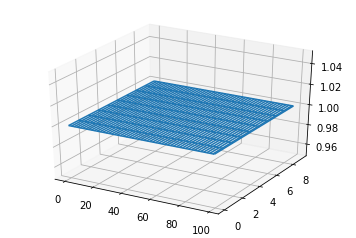

In [12]:
a = np.arange(100)
b = np.arange(10)
aa, bb = np.meshgrid(a, b)
aa.shape, bb.shape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(aa, bb, np.ones((10, 100)))

In [13]:
import unittest

# unit test of differential functions
class testdifferential(unittest.TestCase):
    def setUp(self):
        self.a = np.arange(144) # test input
        self.a = self.a.reshape(12, 12) # 2d array
        self.ddthreshold = 1E-16
        
    def test_ddx(self):
        da = d_dx(self.a, 1)
        diff = np.abs(da[1:-1] - np.mean(da[1:-1]))
        maxdiff = np.max(diff)
        self.assertTrue(np.all(np.abs(da[-1:1] < self.ddthreshold)),"expected zero along borders")
        self.assertTrue(np.all(diff < self.ddthreshold),"Expected constant d_dx less than %f but got %f"%(self.ddthreshold,maxdiff))
    
    def tearDown(self):
        del(self.a)
        del(self.ddthreshold)
        
        
unittest.main(argv=['first-arg-is-ignored'], exit=False)

#You can pass further arguments in the argv list, e.g.

#unittest.main(argv=['ignored', '-v'], exit=False)      
#unittest.main()

..

float32 float32 float32



----------------------------------------------------------------------
Ran 2 tests in 0.079s

OK


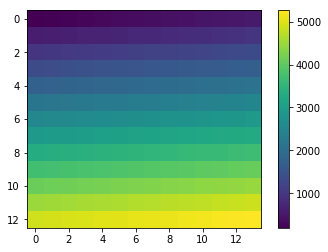

In [14]:
b = np.arange(196)
b = b.reshape(14, 14)
b = b*b #x^2 array

fig, ax = plt.subplots()
adif = plt.imshow(d_dx(b, 1)) # should print a constange in x with odd boundaries
plt.colorbar()

In [15]:
a= np.arange(144)
b = a.reshape(12, 12)
print (b[7, 6])
np.where(b > 90)


90


(array([ 7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11]),
 array([ 7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
         0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
        10, 11]))

In [16]:
a= np.arange(64).reshape(8,8)
print(a)
print(a[1:]-a[:-1])
foof = np.empty((9,8), dtype=int)
foof[1:-1] = a[1:]-a[:-1]
foof[0] = foof[-1] = 0
foof

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]]


array([[0, 0, 0, 0, 0, 0, 0, 0],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8, 8, 8, 8],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
tpl = np.array([10, 30])
-tpl

array([-10, -30])

In [18]:
a = np.arange(32,dtype=np.float32).reshape(4,8)
(a*1/3+0.5).dtype

dtype('float32')